In [4]:
library(data.table)

In [5]:
dt = fread("MatVolat CSV.csv")

In [6]:
# getting the first row to set it as names 
names = c("strike")
for(obj in dt[1]){
    if(!is.na(obj)){
        names = c(names,obj)
    } 
}
# deleting the first row in the data frame
dt = dt[-c(1),]

In [ ]:
#transforming the data, to transform the ',' to '.', and convert it to numeric value
dt[,V2:=as.numeric(gsub(",",".",V2))]
dt[,V3:=as.numeric(gsub(",",".",V3))]
dt[,V4:=as.numeric(gsub(",",".",V4))]
dt[,V5:=as.numeric(gsub(",",".",V5))]
dt[,V6:=as.numeric(gsub(",",".",V6))]
dt[,V7:=as.numeric(gsub(",",".",V7))]
dt[,V8:=as.numeric(gsub(",",".",V8))]
dt[,V9:=as.numeric(gsub(",",".",V9))]
dt[,V10:=as.numeric(gsub(",",".",V10))]
dt[,V11:=as.numeric(gsub(",",".",V11))]
dt[,V12:=as.numeric(gsub(",",".",V12))]
dt[,V13:=as.numeric(gsub(",",".",V13))]
dt[,V14:=as.numeric(gsub(",",".",V14))]

In [8]:
# check of the types of each column of my df to make sur everything is ok 
str(dt)

Classes 'data.table' and 'data.frame':	21 obs. of  14 variables:
 $ V1 : int  800 1000 1100 1300 1400 1500 2000 2200 2400 2500 ...
 $ V2 : num  0.727 0.642 0.574 0.531 0.527 ...
 $ V3 : num  0.571 0.528 0.424 0.502 0.492 ...
 $ V4 : num  0.46 0.525 0.496 0.457 0.441 ...
 $ V5 : num  0.481 0.467 0.451 0.447 0.421 ...
 $ V6 : num  0.483 0.458 0.427 0.411 0.407 ...
 $ V7 : num  0.449 0.453 0.454 0.411 0.405 ...
 $ V8 : num  0.466 0.438 0.413 0.406 0.403 ...
 $ V9 : num  0.449 0.414 0.402 0.39 0.403 ...
 $ V10: num  0.447 0.398 0.385 0.394 0.376 ...
 $ V11: num  0.442 0.421 0.382 0.38 0.377 ...
 $ V12: num  0.49 0.425 0.422 0.405 0.373 ...
 $ V13: num  0.475 0.405 0.408 0.418 0.4 ...
 $ V14: num  0.476 0.427 0.396 0.407 0.393 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [206]:
#setnames(dt,names)

In [9]:
#transforming our datatable to a dataframe to make my data processing a little bit easier ...
df = as.data.frame(dt)

In [ ]:
#displaying the variation of the option price

#### Plot de l'evolution du prix de l'option en fonction de la maturité (strike fixé) 

In [ ]:
# conversion des label de maturité pour le placer sur l'axe des plots
maturity.names.converted = as.data.table(names[2:length(names)])[,V1:=as.numeric(gsub(",",".",V1))]$V1

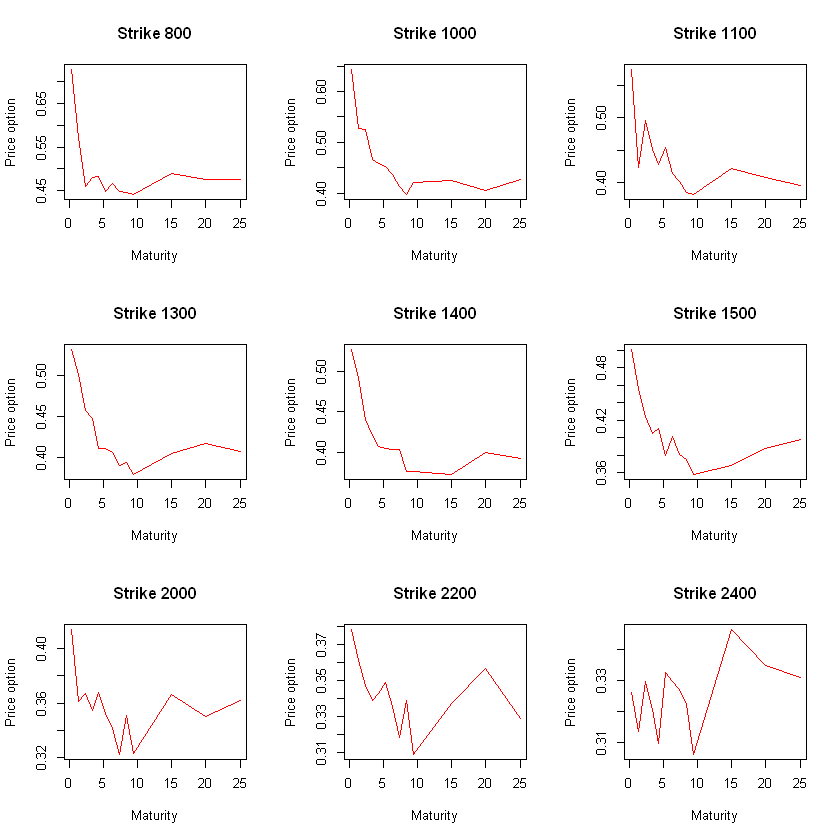

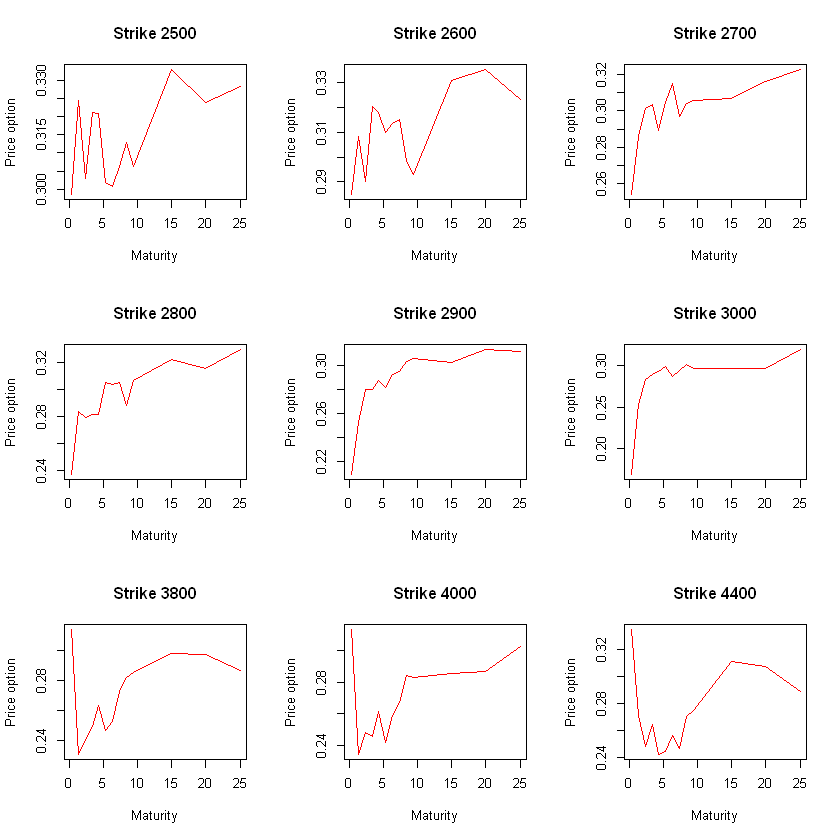

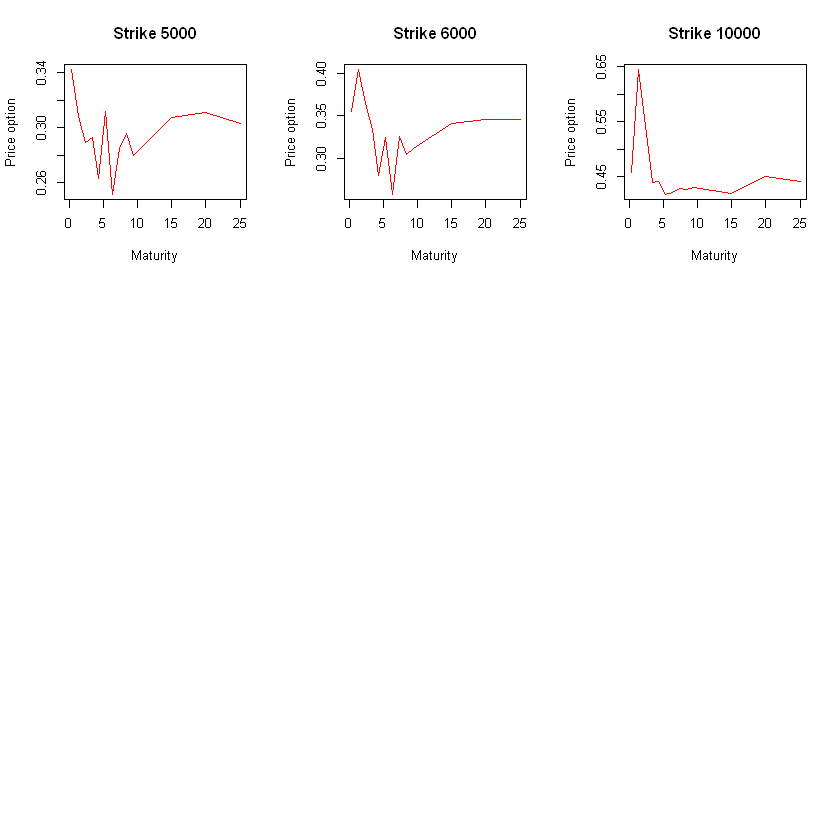

In [120]:
par(mfrow=c(3,3))

for(i in seq(1,nrow(df))){
    vec.temp = c()
    for(j in seq(2,ncol(df))){
        vec.temp = c(vec.temp,df[i,j])    
    }
    plot(vec.temp ~ maturity.names.converted,
                 xlab = "Maturity",
                 ylab = "Price option",
                 col="red",
                 type="l",
                 main = paste("Strike",df[i,1]))
}

#### Plot de l'evolution du prix de l'option en fonction du strike (maturité fixée) 

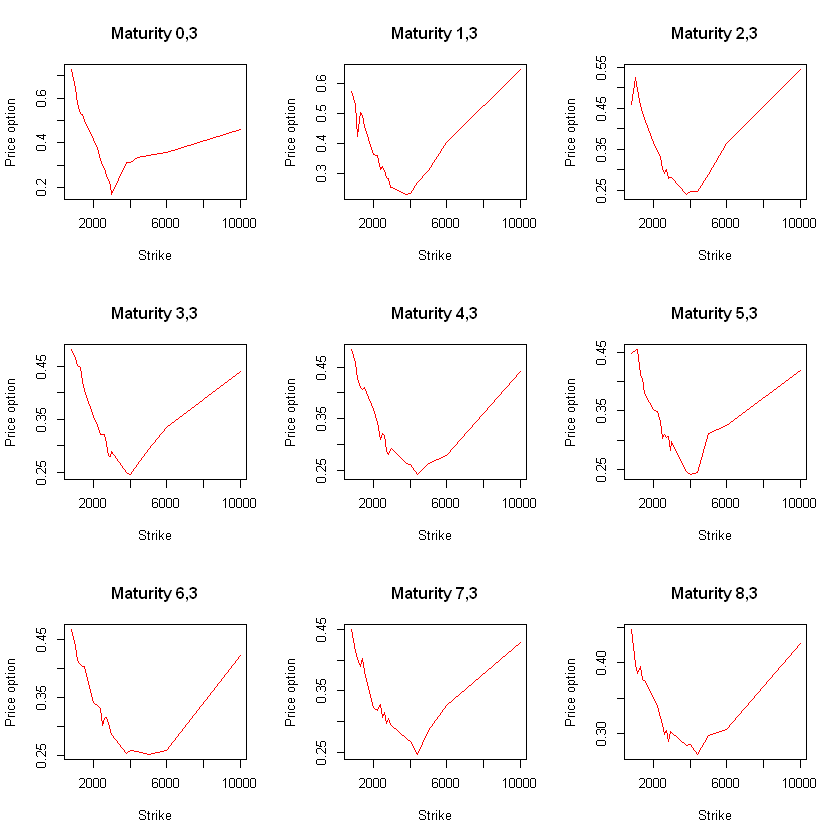

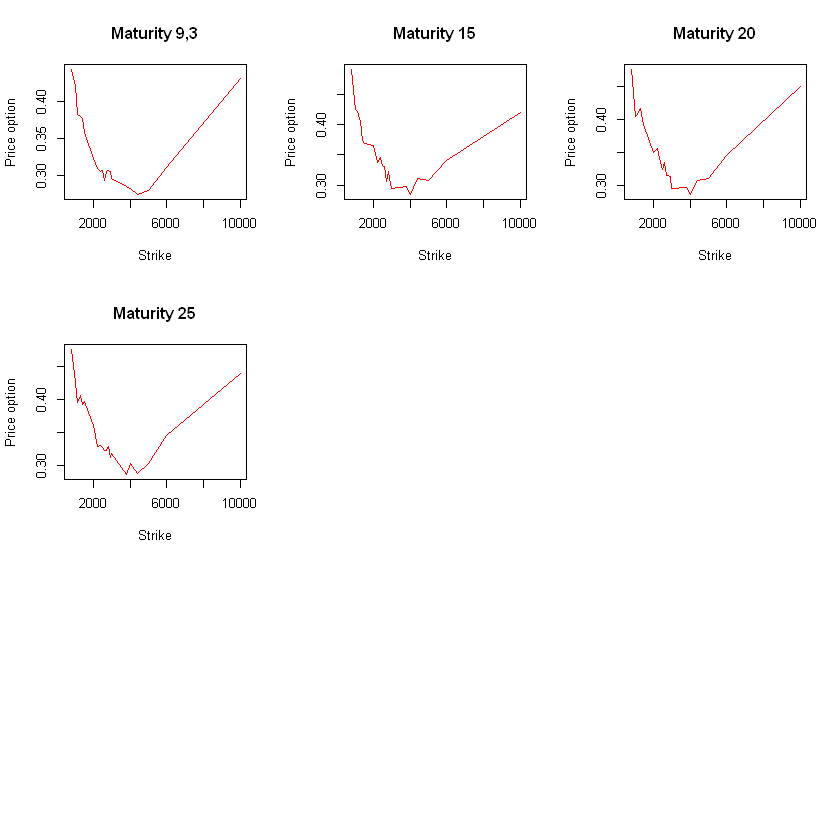

In [54]:
index = 2 
par(mfrow=c(3,3))
for(name in names(df)){
    if(name!="V1"){
        plot(df[,name] ~ df$V1,
             xlab = "Strike",
             ylab = "Price option",
             col="red",
             type="l",
             main = paste("Maturity",names[index]))
        index = index+1
    }
}

In [ ]:
# creating a dataframe that will contain the strikes, and the variation  of each option price instead of the price of the option
df.var = data.frame(strike = df$V1)
# computing the variation rate of each column ( each maturity)
range.of.df = seq(1,nrow(df))

for(name in names(df) ){
    vec.var.rate = c(0)
    for(i in range.of.df-1){
        var.rate = (df[i+1,name] - df[i,name]) / df[i,name]
        vec.var.rate = c(vec.var.rate, var.rate)
    }
    df.var[,name]=vec.var.rate 
}

#### plot de la VARIATION du prix de l'option pour une maturité fixée 

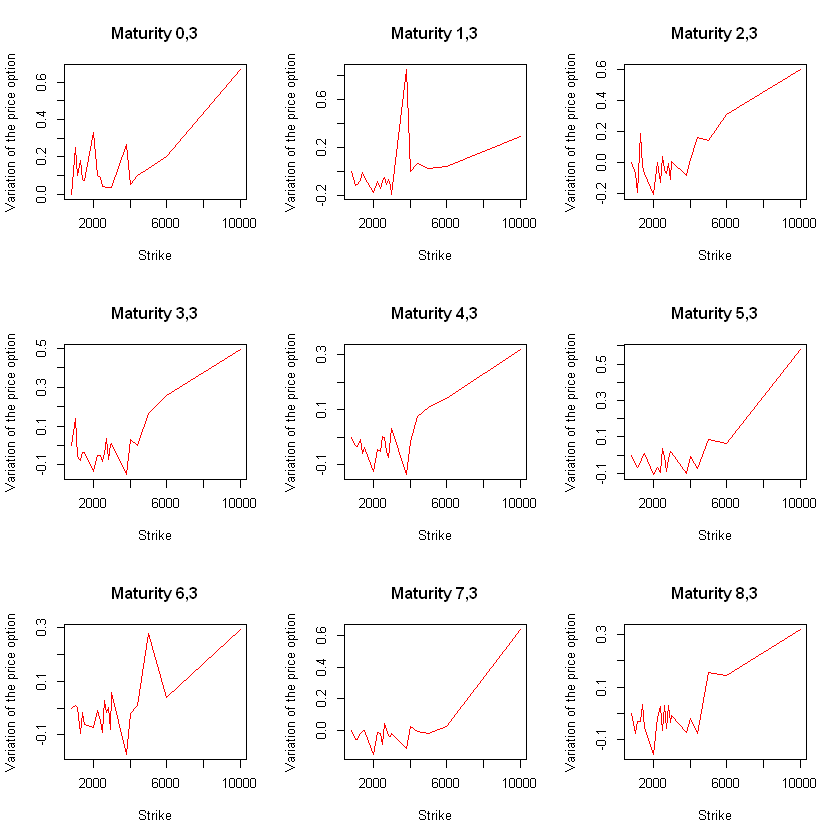

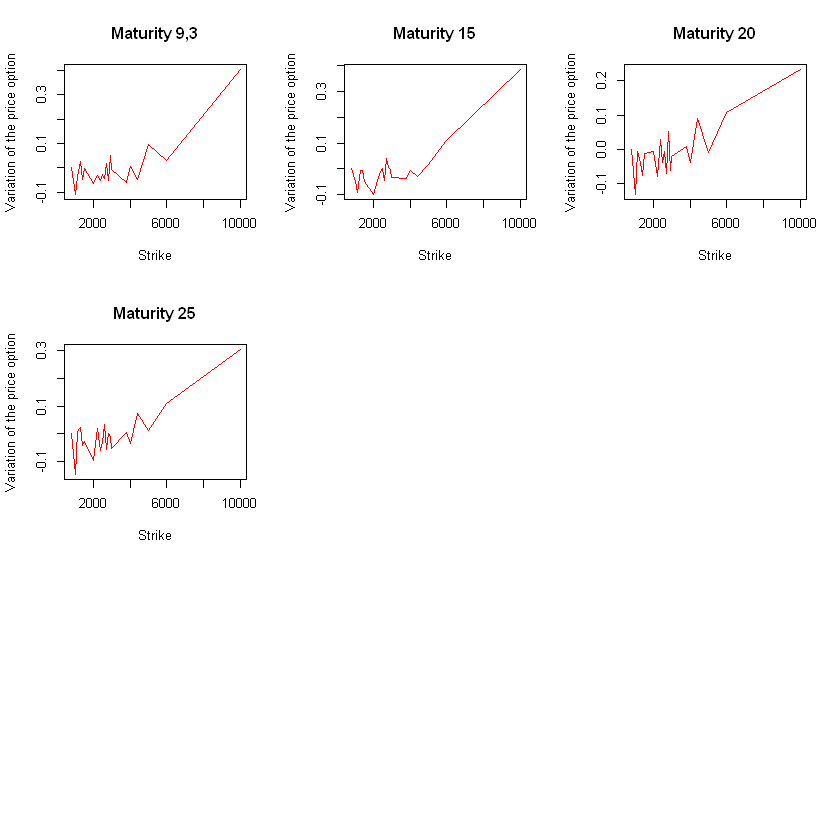

In [153]:
par(mfrow=c(3,3))
for(i in seq(2:ncol(df.var))){
    if(i>1){
     plot(df.var[,1],
          df.var[,i],
          type ="l",
          xlab = "Strike",
          ylab = "Variation of the price option",
          col  = "red",
          main = paste("Maturity",names[i])
         )   
    }   
}
